In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_proteins_all = pd.read_csv("data/iNPH_data_protein_nonormalization.csv", index_col=[0])
df_proteins_median_all = pd.read_csv("data/iNPH_data_protein_median.csv", index_col=[0])

df_peptides_all = pd.read_csv("data/iNPH_data_peptide_nonormalization.csv", index_col=[0])
df_peptides_median_all = pd.read_csv("data/iNPH_data_peptide_median.csv", index_col=[0])

In [3]:
# Some values are defined as inf. They are replaced with NaN since no def for inf. exists as of now

df_proteins_all.replace([np.inf, -np.inf], np.nan, inplace=True)
df_proteins_median_all.replace([np.inf, -np.inf], np.nan, inplace=True)

# Number of inf in peptide dataset
print("Number of inf. values in peptide dataset: %.d" % (np.isinf(df_peptides_all.loc[:,'P55011..93.114.':]).values.sum())) # Sanity check


Number of inf. values in peptide dataset: 0


In [4]:
# Extract lumbar and ventricular samples for proteins
df_proteins_ventricular = df_proteins_all[df_proteins_all["CSF_type"] == "V"]
df_proteins_lumbar = df_proteins_all[df_proteins_all["CSF_type"] == "L"]

df_proteins_ventricular_median = df_proteins_median_all[df_proteins_median_all["CSF_type"] == "V"]
df_proteins_lumbar_median = df_proteins_median_all[df_proteins_median_all["CSF_type"] == "L"]

# Extract lumbar and ventricular samples for peptides

df_peptides_ventricular = df_peptides_all[df_peptides_all["CSF_type"] == "V"]
df_peptides_lumbar = df_peptides_all[df_peptides_all["CSF_type"] == "L"]

df_peptides_ventricular_median = df_peptides_median_all[df_peptides_all["CSF_type"] == "V"]
df_peptides_lumbar_median = df_peptides_median_all[df_peptides_all["CSF_type"] == "L"]

# Remove all cols but proteins

df_proteins_ventricular = df_proteins_ventricular.loc[:,"P02768":]
df_proteins_lumbar = df_proteins_lumbar.loc[:, "P02768":]

df_proteins_ventricular_median = df_proteins_ventricular_median.loc[:,"P02768":]
df_proteins_lumbar_median = df_proteins_lumbar_median.loc[:,"P02768":]

# Remove all cols but peptides

df_peptides_ventricular = df_peptides_ventricular.loc[:,'P55011..93.114.':]
df_peptides_lumbar = df_peptides_lumbar.loc[:,'P55011..93.114.':]

df_peptides_ventricular_median = df_peptides_ventricular_median.loc[:,'P55011..93.114.':]
df_peptides_lumbar_median = df_peptides_lumbar_median.loc[:,'P55011..93.114.':]

# Remove below?

df_proteins_all_prot = df_proteins_all.loc[:, "P02768":]

In [5]:
tmt_set_ventricular = df_proteins_all.loc[df_proteins_ventricular.index]["TMT Set"]
tmt_set_lumbar = df_proteins_all.loc[df_proteins_lumbar.index]["TMT Set"]

In [6]:
df_proteins_all_prot = pd.merge(df_proteins_all_prot, df_proteins_all[['TMT Set']], left_index=True, right_index=True, how='left')

In [7]:
missingness_per_group = df_proteins_all_prot.groupby('TMT Set').apply(lambda x: x.isnull().mean())

* Missingness imputation within TMT_Set?

<Axes: title={'center': 'Missingness per TMT Set all proteins'}, xlabel='TMT Set'>

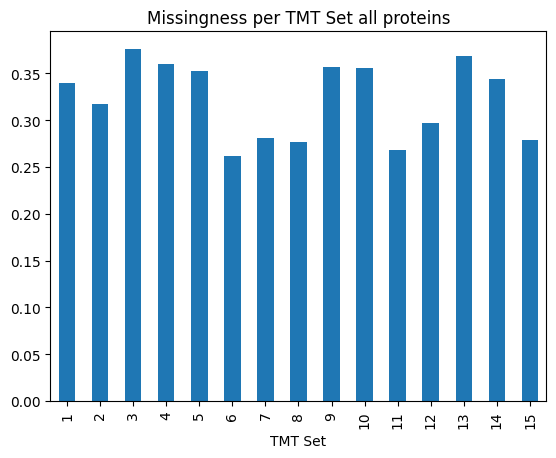

In [35]:
missingness_per_group.T.apply(lambda x: x.mean()).plot(kind="bar", title="Missingness per TMT Set all proteins")

In [9]:
def plot_missingness_by_column(dataframe, column_to_group_by, n=10):
    """
    Plot n columns with the highest ratio of missing values based on a specific column.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_to_group_by (str): The column based on which to group and calculate missing value ratios.
    - n (int): Number of columns to plot. Default is 10.
    """
    # Calculate missing value ratios for each column grouped by the specified column
    missing_ratios_by_group = dataframe.groupby(column_to_group_by).apply(lambda x: x.isnull().mean())
    # Get the n columns with the highest missing value ratios for each group
    top_columns_by_group = missing_ratios_by_group.mean(axis=0).sort_values(ascending=False).index[:n]
    #print(top_columns_by_group)
    # Create a bar plot for each group
    plt.figure(figsize=(12, 6))
    for group in missing_ratios_by_group.items():
        sns.barplot(x=ratios[top_columns_by_group], y=top_columns_by_group, label=group)

    plt.title(f'Top {n} Columns with Highest Missing Value Ratios Grouped by {column_to_group_by}')
    plt.xlabel('Missing Value Ratio')
    plt.ylabel('Columns')
    plt.legend(title=column_to_group_by)
    plt.show()

In [44]:
def plot_columns_with_highest_missing_ratio(dataframe, title_desc, n=5, plot_y_ticks = False):
    """
    Plot n columns with the highest ratio of missing values in the given DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - n (int): Number of columns to plot. Default is 5.
    """
    # Calculate missing value ratios for each column
    missing_ratios = dataframe.isnull().mean()

    # Sort columns based on missing value ratios in descending order
    sorted_columns = missing_ratios.sort_values(ascending=False).index[:n]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_ratios[sorted_columns], y=sorted_columns, color='skyblue')
    if not plot_y_ticks:
        plt.yticks([])
    plt.title(f'Top {n} {title_desc} columns with highest missing value ratios')
    plt.xlabel('Missing Value Ratio')
    plt.ylabel('Columns')
    plt.show()

# Protein missingness

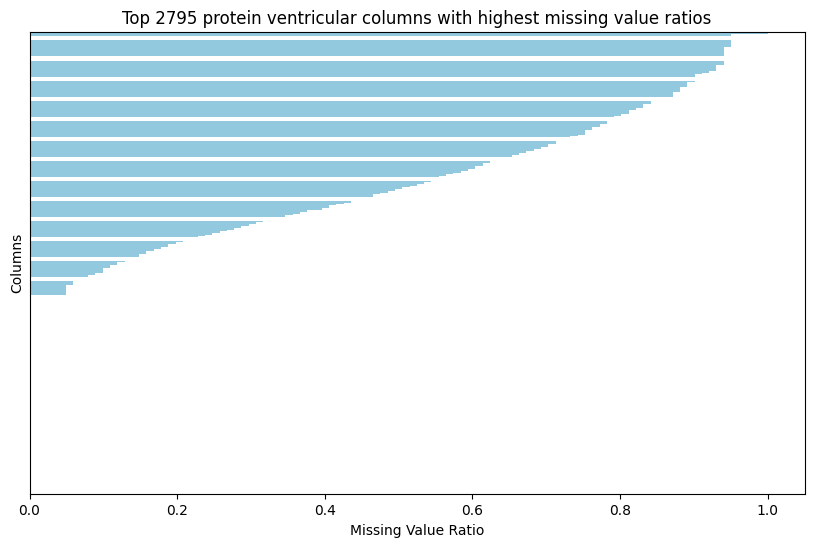

In [46]:
plot_columns_with_highest_missing_ratio(df_proteins_ventricular, n=df_proteins_ventricular.shape[1], title_desc="protein ventricular")

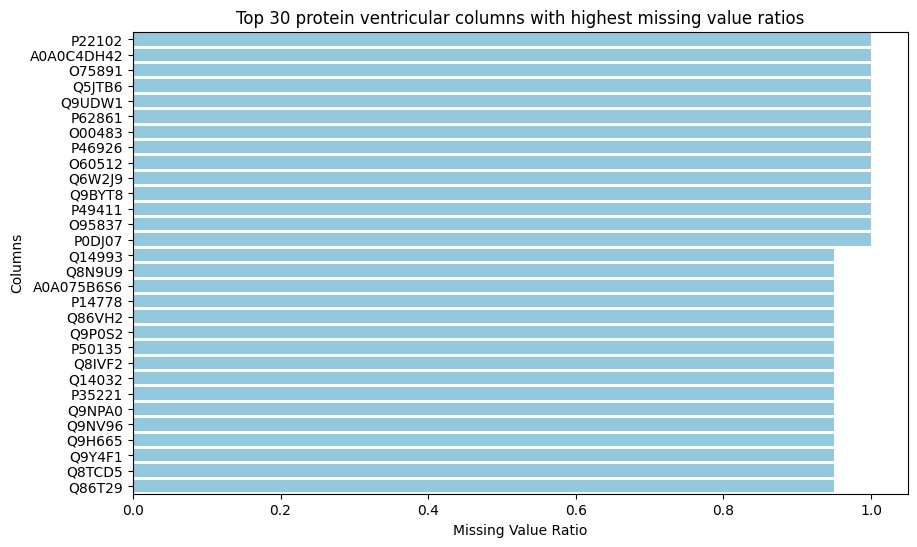

In [48]:
plot_columns_with_highest_missing_ratio(df_proteins_ventricular, n=30, plot_y_ticks=True, title_desc="protein ventricular")

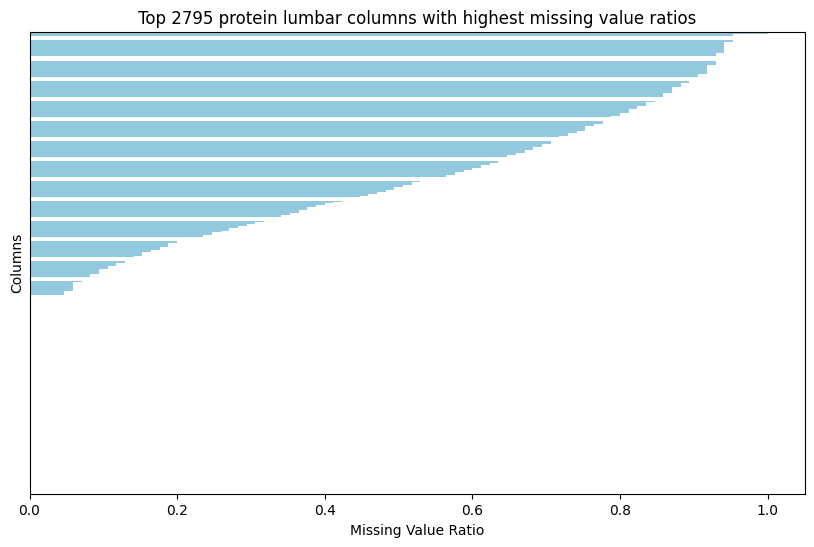

In [50]:
plot_columns_with_highest_missing_ratio(df_proteins_lumbar, n=df_proteins_lumbar.shape[1], title_desc="protein lumbar")

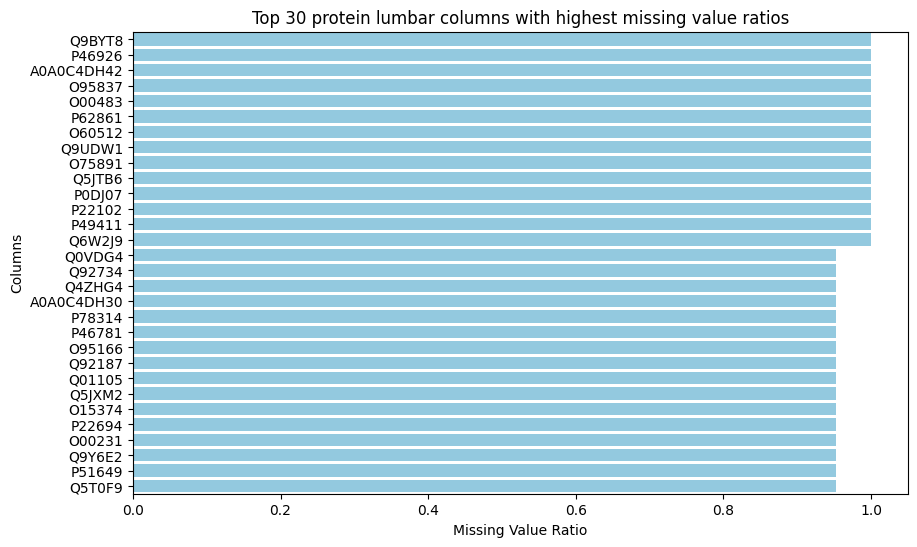

In [51]:
plot_columns_with_highest_missing_ratio(df_proteins_lumbar, n=30, plot_y_ticks=True, title_desc="protein lumbar")

# Peptide missingness

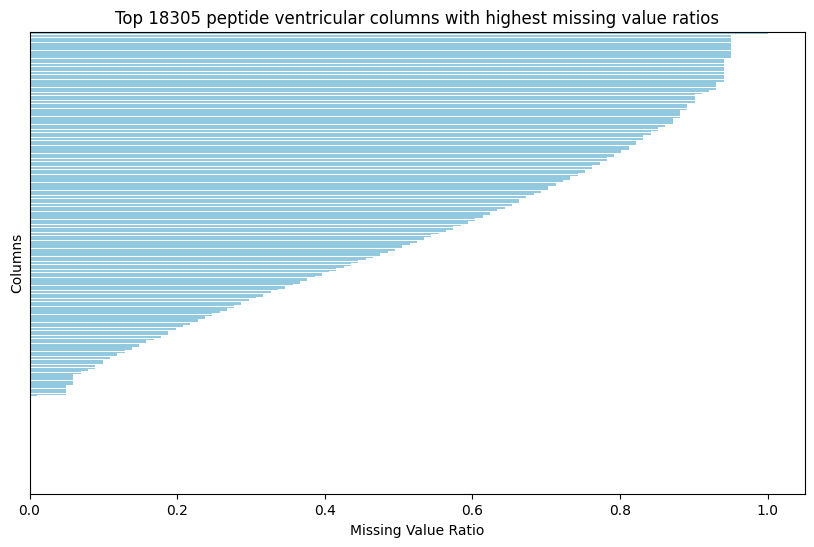

In [53]:
plot_columns_with_highest_missing_ratio(df_peptides_ventricular, n=df_peptides_ventricular.shape[1], title_desc="peptide ventricular")

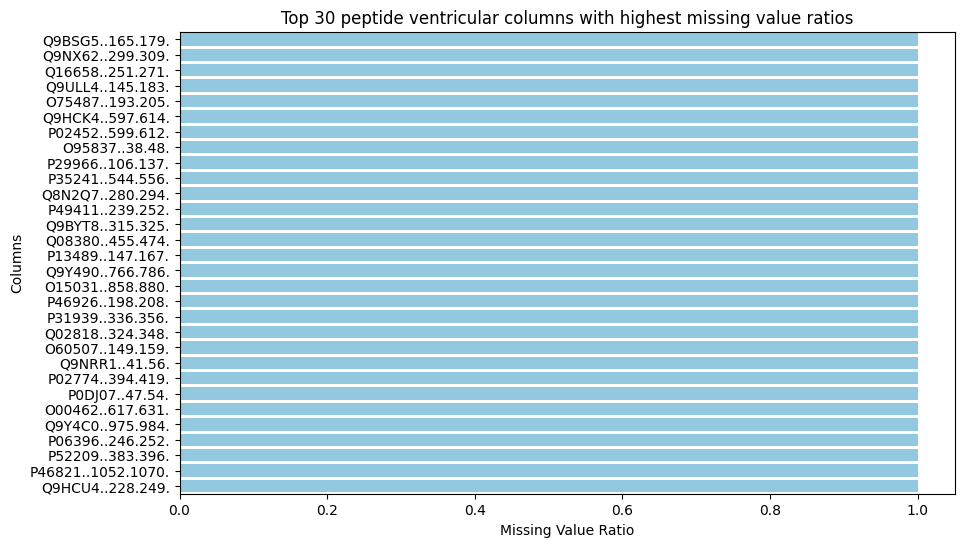

In [54]:
plot_columns_with_highest_missing_ratio(df_peptides_ventricular, n=30, plot_y_ticks=True, title_desc="peptide ventricular")

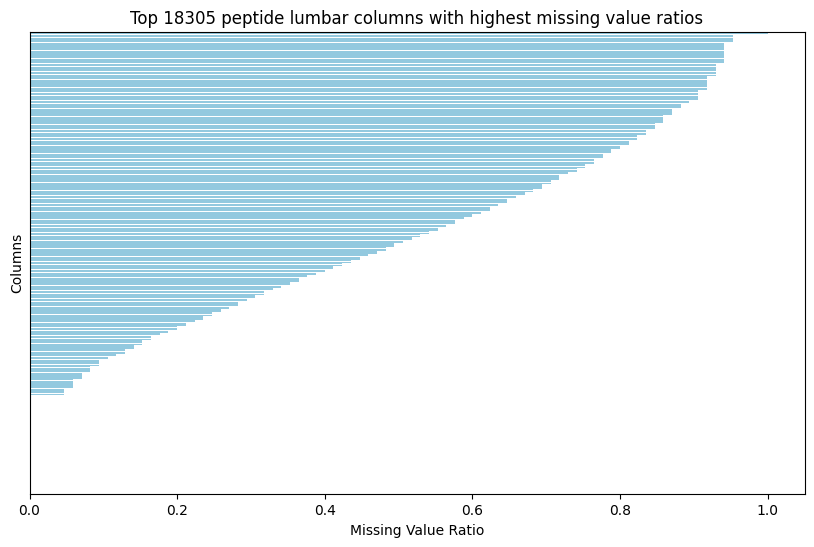

In [55]:
plot_columns_with_highest_missing_ratio(df_peptides_lumbar, n=df_peptides_lumbar.shape[1],title_desc="peptide lumbar")

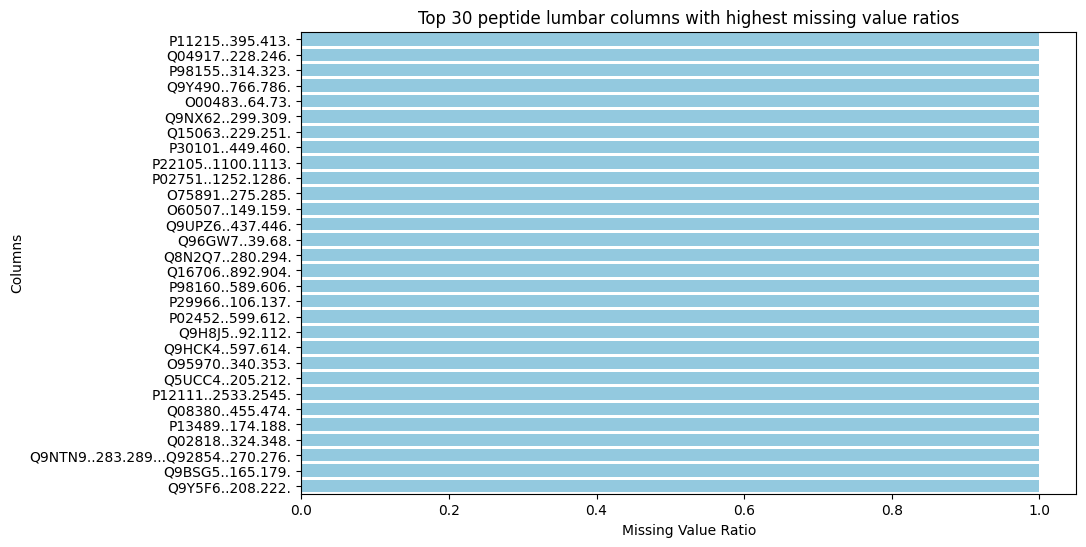

In [58]:
plot_columns_with_highest_missing_ratio(df_peptides_lumbar, n=30, plot_y_ticks=True, title_desc="peptide lumbar")

In [19]:
def set_max_missingness_per_column(df, threshold=0.5):
    """
    Removes columns with nan values above a threshold.

    :param df: Dataframe-base to remove NaN-heavy columns from.
    :param threshold: Threshold percentage of missingness allowed per column.
    :return: New dataframe without NaN-heavy columns.
    """ 
    nan_percentage = (df.isna().mean()).round(4)
    selected_columns = nan_percentage[nan_percentage <= threshold].index
    return df[selected_columns]

# MiceForest

MiceForest is a library implementing the MICE imputation technique. 

Other alternatives are sk.learns IterativeImputer, however, it's very memory inefficient and won't run due to the many features in our dataset. Therefore we decided to opt for MiceForest library instead.

In [71]:
import miceforest as mf
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'miceforest'

In [104]:
# Create kernel. 
kds = mf.ImputationKernel(
  df_proteins_ventricular_log,
  #save_all_iterations=True,
  datasets=1,
  random_state=1991,
)
kds.mice(
    iterations=1,
    device = "gpu"
)
completed_dataset = kds.complete_data()

In [105]:
completed_dataset

,P02768,P02787,P01009,P01024,P0C0L5,P02649,P0DOY2,P00738,P06396,P02647,...,Q08257,Q56P03,Q9UJ90,P31948,P05107,Q5JXB2,O43707,O75339,O14960,Q07812
4,0.620487,0.810500,0.538556,0.672239,0.853909,0.680424,0.458017,0.917962,0.695606,0.590774,...,0.986791,0.778684,0.728320,1.072510,0.651805,0.616061,0.918165,0.456640,0.749774,0.812273
7,0.323509,0.459653,0.373801,0.328179,0.324219,0.201416,0.245745,0.095985,0.233642,0.268838,...,0.615116,0.203441,0.397901,0.464680,0.308363,0.408898,0.580518,0.171058,0.502049,0.402674
8,0.727067,0.741130,0.718833,0.827503,0.806378,0.686002,0.822964,1.238887,0.702736,0.742724,...,0.877924,0.579138,0.781085,0.946651,0.654677,0.728199,0.836491,0.456640,0.782804,0.745744
9,0.588443,0.731680,0.576411,0.735487,0.645439,0.487743,0.474567,0.742661,0.586147,0.623069,...,1.061787,0.579138,0.553579,1.231436,0.651805,0.694519,1.072981,0.444117,0.749774,0.682027
10,0.692243,0.883108,0.686667,0.550668,0.955447,1.041599,0.484939,0.533538,0.872919,0.493093,...,0.951263,0.740314,0.950150,1.205654,0.873171,0.691961,0.880353,0.653999,0.993267,0.851108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.394828,0.562687,0.456849,0.399527,0.482341,0.478690,0.196685,0.581737,0.427145,0.397591,...,0.610425,0.383005,0.506512,0.667637,0.448910,0.432960,0.514417,0.436427,0.760215,0.483181
183,0.646017,0.782859,0.638014,0.650172,0.772284,0.806947,0.652406,0.811099,0.721688,0.798425,...,1.216744,0.706898,0.716163,1.114221,0.678039,0.743753,0.880353,0.459253,0.867351,0.752094
184,0.709687,0.896284,0.661644,0.791941,0.896041,0.929661,0.497586,0.469915,0.865556,0.634218,...,1.022816,0.908588,0.868213,1.039481,0.633076,0.774211,0.771225,0.581915,1.049594,0.811162
185,0.452004,0.636365,0.431456,0.473871,0.601522,0.443268,0.340824,0.635367,0.480395,0.306439,...,0.600386,0.426365,0.647046,0.686059,0.479293,0.526404,0.594538,0.338596,0.208935,0.638204


In [38]:
pca_median = PCA(n_components=2, svd_solver="randomized")
pca_ventricular = pca_median.fit_transform(df_proteins_ventricular_zeros)

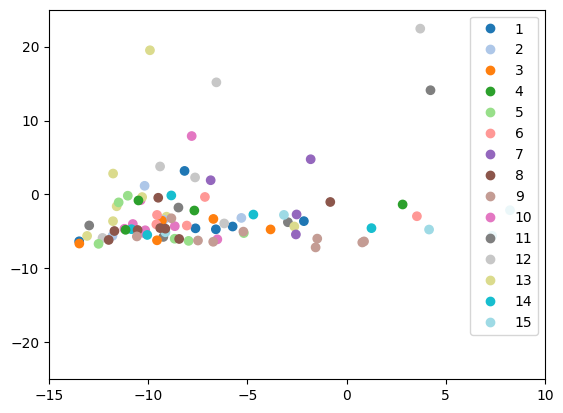

In [40]:
plot = plt.scatter(pca_ventricular[:,0], pca_ventricular[:,1], c=tmt_set_ventricular, cmap = "tab20")
plt.legend(handles=plot.legend_elements()[0], labels=set(tmt_set_ventricular))
plt.xlim(-15, 10)
plt.ylim(-25, 25)
plt.show()

# SimpleImpute & T-SNE Plots for proteins

In [20]:
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

In [21]:
class SampMin(SimpleImputer):
    """
        SampMin imputation strategy. Imputes values with the lowest observed value for each column/feature.
    """
    def fit(self, X, y=None):
        # Calculate the minimum values for each column
        X = X.dropna(axis=1, how='all') # Drop if all values are missing
        self.min_values = X.min() 
        return X

    def transform(self, X):
        # Replace NaN values with the minimum value observed in each column
        return X.fillna(self.min_values)
    
    def fit_transform(self, X):
        X = self.fit(X)
        return self.transform(X)


In [22]:
def plot_tnse(tsne, c, title):
    plt.scatter(tsne[:, 0], tsne[:,1], c=c, cmap="tab20")
    plt.title("T-SNE plot " + title)
    plt.xlabel("T-SNE_1")
    plt.ylabel("T-SNE_2")
    plt.show()

In [23]:
def apply_tsne(df, n_components = 2, random_state = None, perplexity = 5):
    """
    Applies T-SNE by fit_transform()

    :param df: Dataframe that's going to be fit_transformed()
    :param n_components: Threshold percentage of missingness allowed per column.
    :param random_state: Seed for random state
    :param perplexity: Sets the perplexity i.e. roughly a global/local cluster trade-off
    :return: T-SNE object
    """ 
    return TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity).fit_transform(df)

In [24]:
def impute_and_plot(df, c, title):
    """
    Imputes using SimpleImputer strategies and creates T-SNE plots for each strategy.

    :param df: Dataframe-base to remove NaN-heavy columns from.
    :param c: Threshold percentage of missingness allowed per column.
    :param title: Plot title (usually ventricular/lumbar and proteins/peptides)
    :return: None:
    """ 
    imputation_methods = ["SampMin", "mean", "median", "constant"]
    for method in imputation_methods:
        if method == "SampMin":
            imputer = SampMin(strategy=method, missing_values=np.nan)
        else:
            imputer = SimpleImputer(strategy=method, missing_values=np.nan, fill_value=0)
        df_imputed = imputer.fit_transform(df)
        tsne = apply_tsne(df_imputed)
        plot_tnse(tsne, c=c, title=title + " (method = " + method + ")")
        

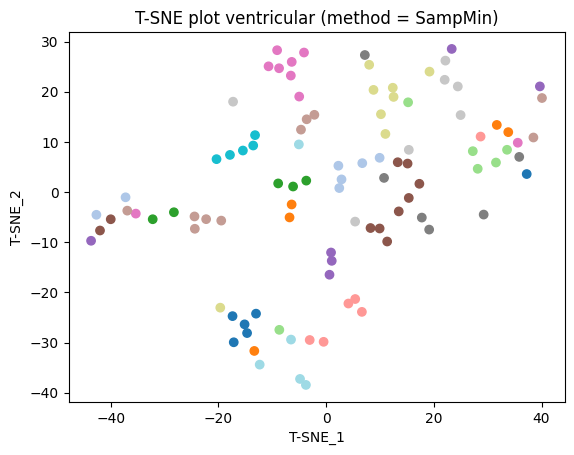

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


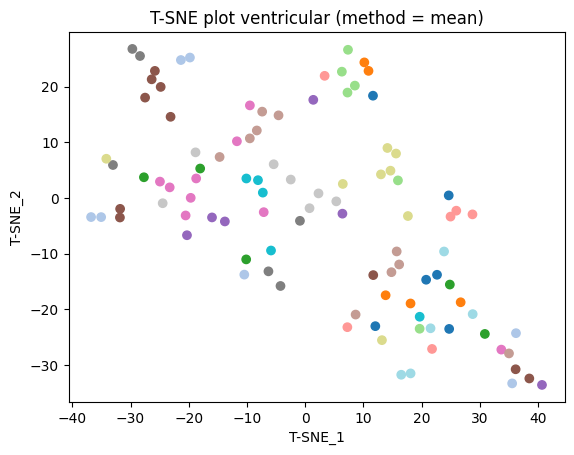

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


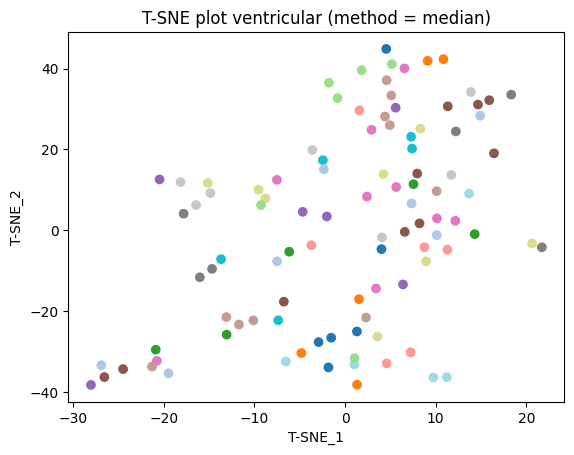

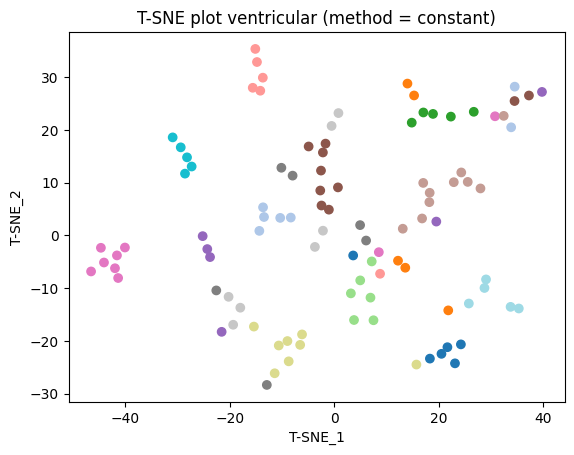

In [215]:
impute_and_plot(df_proteins_ventricular, tmt_set_ventricular, title="ventricular")

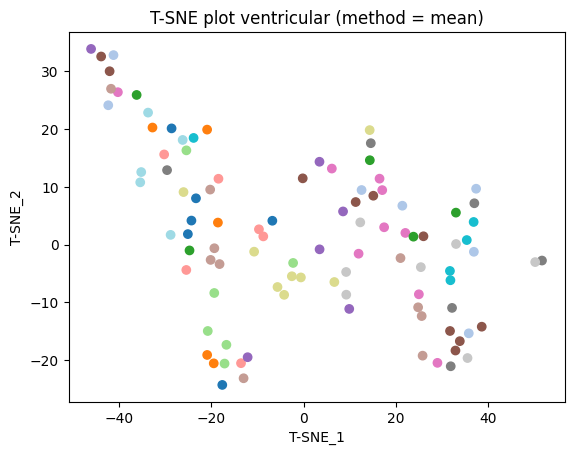

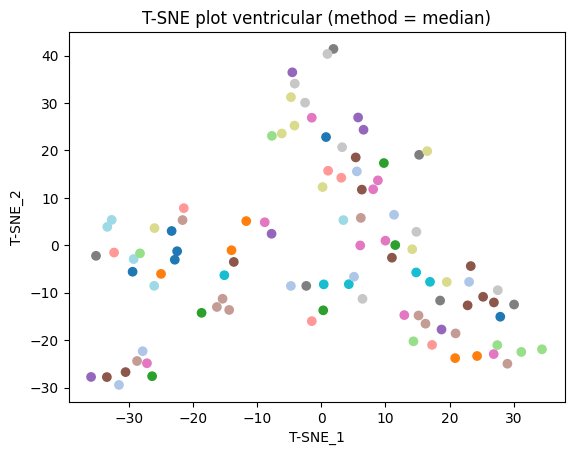

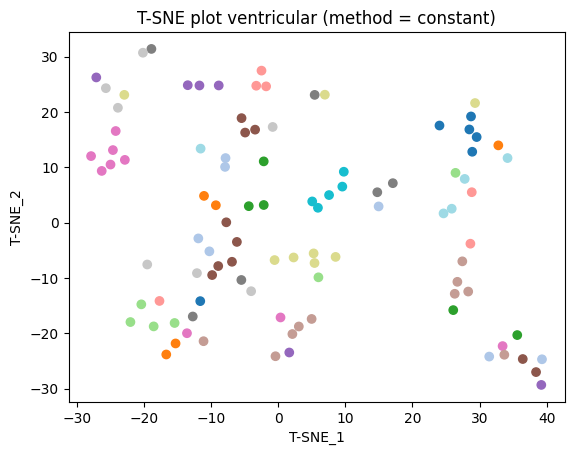

In [70]:
impute_and_plot(df_proteins_ventricular, tmt_set_ventricular, title="ventricular")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


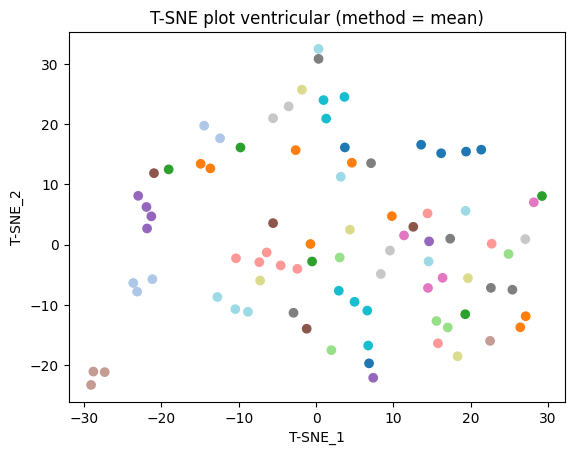

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


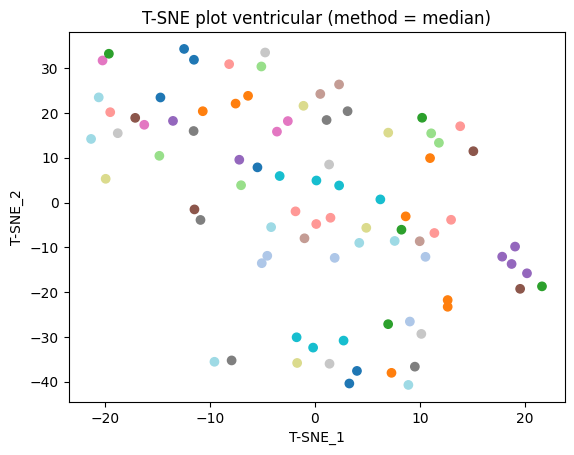

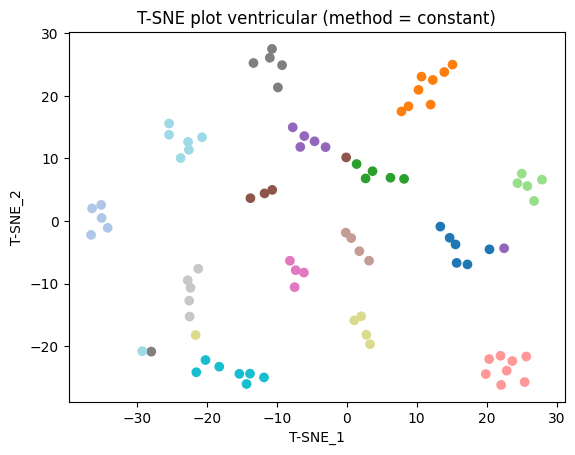

In [68]:
impute_and_plot(df_proteins_lumbar, tmt_set_lumbar, title="lumbar")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


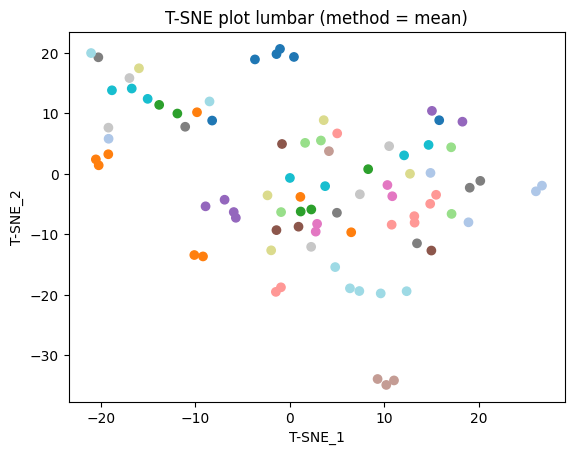

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


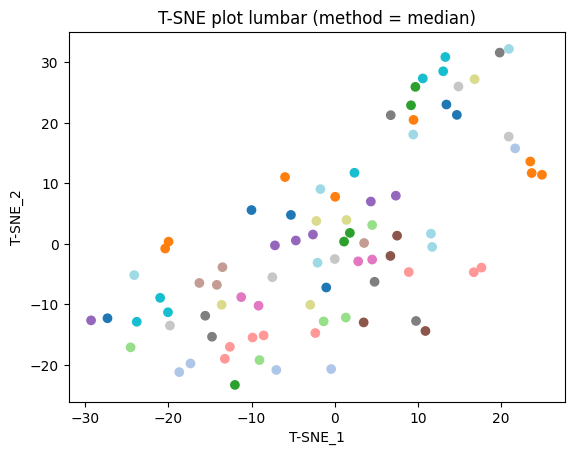

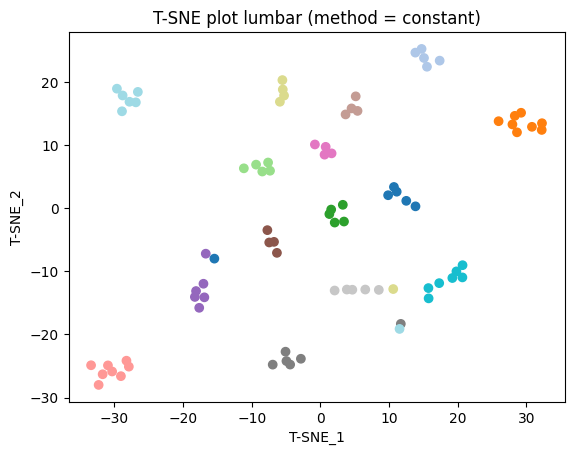

In [69]:
impute_and_plot(df_proteins_lumbar_median, tmt_set_lumbar, title="lumbar")

# SimpleImpute and Plots for peptides

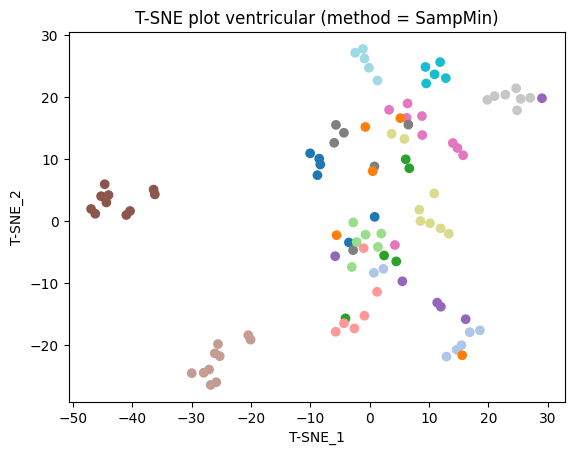

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Q6UXK5..435.448.' 'P12111..2533.2545.' 'P13489..147.167.'
 'P84157..114.142.' 'O95185..167.176.' 'P35241..544.556.' 'Q96GW7..39.68.'
 'Q02818..324.348.' 'P02774..394.419.' 'P49411..239.252.' 'O95837..38.48.'
 'Q9BUN1..62.76.' 'Q15582..235.257.' 'Q15063..229.251.' 'Q08380..455.474.'
 'P02730..347.360.' 'Q9NX62..299.309.' 'Q8N2Q7..280.294.'
 'Q92673..234.249.' 'Q9H8J5..92.112.' 'Q9HCU4..228.249.' 'P00915..59.77.'
 'Q9UDW1..35.51.' 'P35241..84.100.' 'Q9ULZ9..59.80.' 'P31939..336.356.'
 'P46926..198.208.' 'P16035..85.108.' 'O75891..275.285.'
 'P61764..197.208.' 'Q16658..251.271.' 'Q9NRR1..41.56.' 'Q8N428..543.558.'
 'O43157..496.507.' 'O00462..617.631.' 'Q9HCK4..597.614.'
 'Q8NFL0..239.257.' 'Q9UHL4..124.143.' 'P02452..599.612.'
 'Q9Y490..766.786.' 'P46821..1052.1070.' 'Q9UPZ6..437.446.'
 'Q9BXJ3..99.110.' 'P62861..42.51.

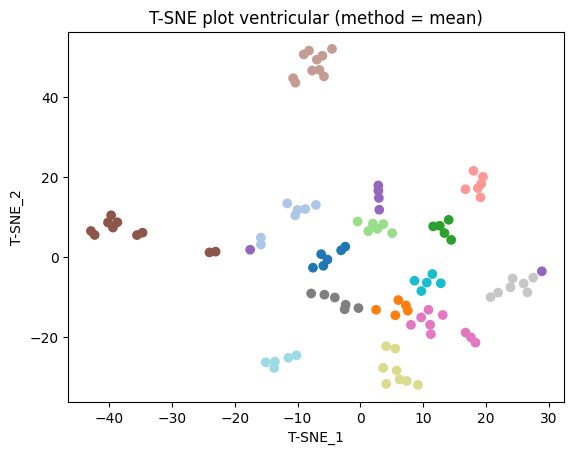

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Q6UXK5..435.448.' 'P12111..2533.2545.' 'P13489..147.167.'
 'P84157..114.142.' 'O95185..167.176.' 'P35241..544.556.' 'Q96GW7..39.68.'
 'Q02818..324.348.' 'P02774..394.419.' 'P49411..239.252.' 'O95837..38.48.'
 'Q9BUN1..62.76.' 'Q15582..235.257.' 'Q15063..229.251.' 'Q08380..455.474.'
 'P02730..347.360.' 'Q9NX62..299.309.' 'Q8N2Q7..280.294.'
 'Q92673..234.249.' 'Q9H8J5..92.112.' 'Q9HCU4..228.249.' 'P00915..59.77.'
 'Q9UDW1..35.51.' 'P35241..84.100.' 'Q9ULZ9..59.80.' 'P31939..336.356.'
 'P46926..198.208.' 'P16035..85.108.' 'O75891..275.285.'
 'P61764..197.208.' 'Q16658..251.271.' 'Q9NRR1..41.56.' 'Q8N428..543.558.'
 'O43157..496.507.' 'O00462..617.631.' 'Q9HCK4..597.614.'
 'Q8NFL0..239.257.' 'Q9UHL4..124.143.' 'P02452..599.612.'
 'Q9Y490..766.786.' 'P46821..1052.1070.' 'Q9UPZ6..437.446.'
 'Q9BXJ3..99.110.' 'P62861..42.51.

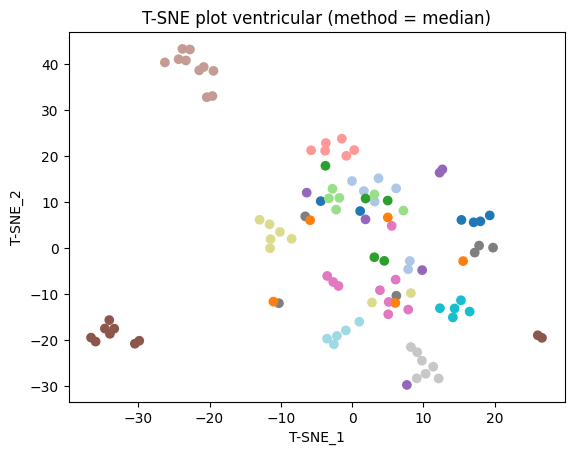

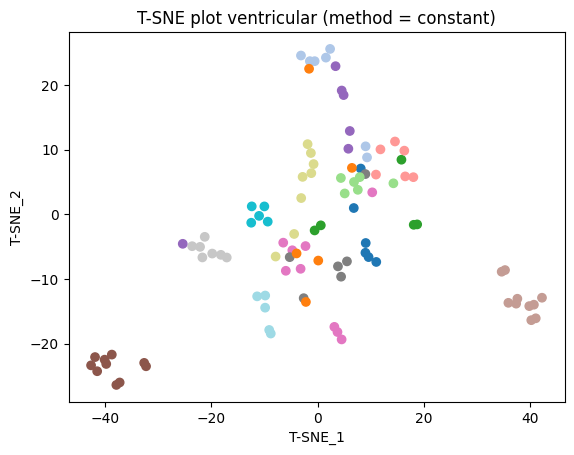

In [59]:
impute_and_plot(df_peptides_ventricular, tmt_set_ventricular, title="ventricular")

# Batch imputations

In [61]:
def impute_by_batch(df, batches):
    imputed_dfs = []
    unique_batches = batches.unique()
    for batch in unique_batches:
        batch_df = df[batches == batch].dropna(axis=1, how="all")
        imputer = SimpleImputer(strategy='mean')
        batch_imputed = pd.DataFrame(imputer.fit_transform(batch_df), columns=batch_df.columns)#.reset_index(drop=True)
        imputed_dfs.append(batch_imputed)
    final_imputed_df = pd.concat(imputed_dfs)
    return final_imputed_df

In [63]:
batch_imputed = impute_by_batch(df_peptides_lumbar, tmt_set_lumbar)

In [64]:
df_peptides_lumbar_1 = df_peptides_lumbar.dropna(axis=1, how = "all")

In [68]:
print("Number of missing peptide lumbar values without batch imputation: %d" % df_peptides_lumbar_1.reset_index().isna().sum().sum())

Number of missing peptide lumbar values without batch imputation 679764


In [70]:
print("Number of missing peptide lumbar values with batch imputation: %d" % batch_imputed.reset_index().isna().sum().sum())

Number of missing peptide lumbar values with batch imputation: 679033


In [167]:
# Look for missingness in each of the classes

# Check for distribution if normal -> 
    # Try removing all missing features above 50%, run Gsimp?
# else:
    # run QRILC?

# Investigate distributions

In [218]:
import statsmodels.api as sm

In [235]:
xxxtest = np.log2(df_proteins_lumbar)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


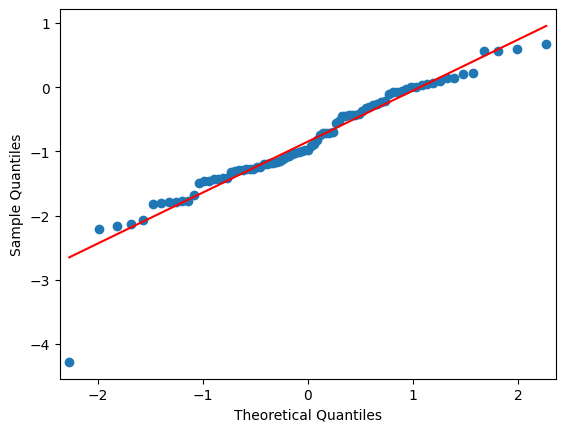

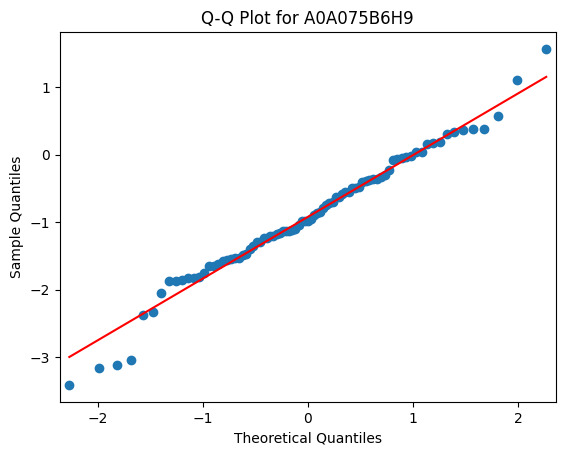

In [426]:
sm.qqplot(data_corrected_log.T[""], line='s')
sm.qqplot(xxxtest["A0A0B4J1V2"], line='s')
plt.title(f'Q-Q Plot for {"A0A075B6H9"}')
plt.show()

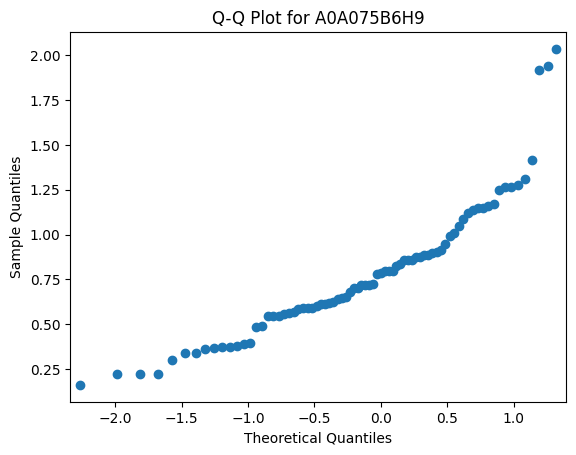

In [228]:
x

# Batch correction using ComBat

Below, we apply the ComBat batch effect correction algorithm to make a simple investigation of the batch effect after imputing protein lumbar data with SampMin.

In [398]:
from combat.pycombat import pycombat

In [399]:
imputer = SampMin(strategy="SampMin", missing_values=np.nan)
data = imputer.fit_transform(df_proteins_lumbar)

In [402]:
data_corrected = pycombat(data.T,tmt_set_lumbar)

Found 15 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [407]:
data_corrected.T

,P02768,P02787,P01009,P01024,P0C0L5,P02649,P0DOY2,P00738,P06396,P02647,...,P06732,Q5UCC4,Q9NUM4,P60903,O75369,Q6P995,Q4KWH8,Q5H9L2,Q8N8N7,Q07812
1,0.481433,0.704421,0.911838,0.604438,1.038950,0.619752,0.522565,0.230137,0.749208,0.472993,...,0.154437,0.455952,0.532262,0.535821,0.457332,0.801055,0.371432,0.448838,0.558835,0.679333
2,1.198767,1.008678,0.959023,0.858863,0.716831,0.309048,0.389789,1.725091,0.832389,1.020127,...,0.154437,0.455952,0.532262,0.535821,0.457332,0.801055,0.371432,0.448838,0.558835,0.679333
3,0.576818,0.599529,0.514848,0.532329,0.888972,0.656080,0.769438,0.425787,0.755623,0.564285,...,0.154437,0.455952,0.532262,0.535821,0.457332,0.801055,0.371432,0.448838,0.558835,0.679333
5,1.101156,1.123770,1.077250,1.460465,0.980214,0.734891,1.239798,1.996731,0.797402,2.018014,...,0.154437,0.455952,0.532262,0.535821,0.457332,0.801055,0.371432,0.448838,0.558835,0.679333
6,0.938230,1.085852,1.212824,1.083067,0.840139,1.215309,0.768232,0.072531,1.198142,0.771487,...,0.154437,0.455952,0.532262,0.535821,0.457332,0.801055,0.371432,0.448838,0.558835,0.679333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.448308,0.607320,0.487740,0.409096,0.517077,0.556365,0.338684,0.235790,0.647226,0.394837,...,0.155179,0.467114,0.434912,0.490358,0.326682,0.802657,0.357074,0.371840,0.560366,0.452898
173,0.728559,0.767960,1.050049,0.791475,0.842293,0.462679,0.606413,0.593328,0.755297,0.663167,...,0.154872,0.421336,0.580390,0.558354,0.331655,0.801749,0.541079,0.445372,0.559434,0.701794
175,0.562134,0.702541,0.614477,0.529488,0.917203,0.826630,0.332752,-0.069753,0.712207,0.534641,...,0.154872,0.421336,0.526902,0.521978,0.289003,0.801749,0.175600,0.445372,0.559434,0.701794
176,1.134303,1.218288,1.104259,1.228463,1.489541,0.780883,0.944791,1.741336,1.256691,1.171925,...,0.154872,0.421336,0.669341,0.713822,0.927535,0.801749,0.471852,0.445372,0.559434,0.701794


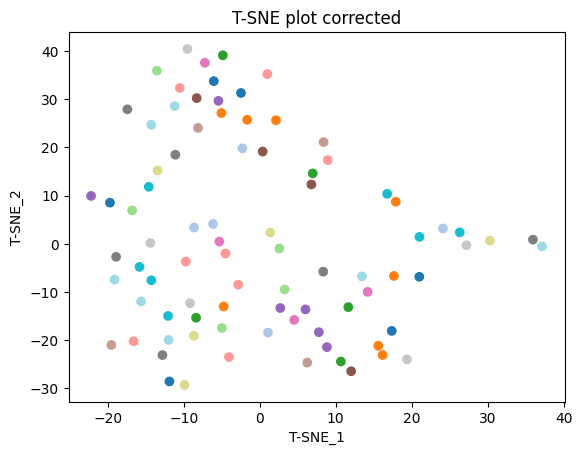

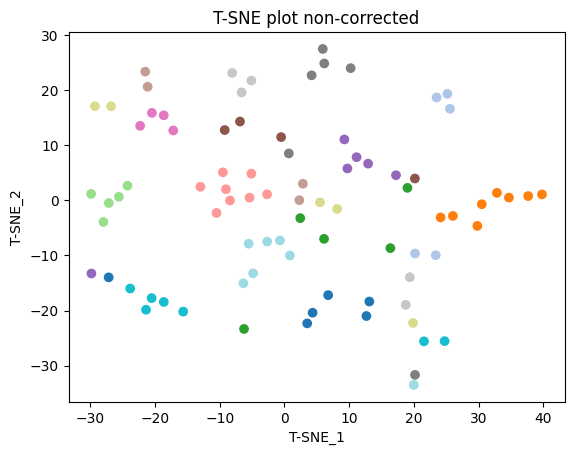

In [415]:
tsne = TSNE(n_components=2, perplexity=5)
tsne_1 = tsne.fit_transform(data_corrected.T)
tsne_2 = tsne.fit_transform(data)
plot_tnse(tsne_1, tmt_set_lumbar, "corrected")
plot_tnse(tsne_2, tmt_set_lumbar, "non-corrected")

By observing the two above plots. We can clearly see that the batch effect is not as appearant after applying ComBat. However, further investigation is neccessary to ensure the data quality is fine. It's also worth to investigate after the data is imputed with a more refined imputation technique such as MICE.

# Some thoughts:

* Some imputation techniques such as GSIMP assumes a normal distribution.
Can we assume data follows a normal dist. after log_2 transform?

* After runnning batch correction algorithm, such as ComBat. Do we need to somehow validate the generated data?